### Working With State Vector 

In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np 
from numpy import linalg
from IPython.display import display as disp , Math, Latex

In [158]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

disp(u,v,w)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))


In [159]:
disp(u.draw('text'))
disp(u.draw('latex'))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

In [160]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

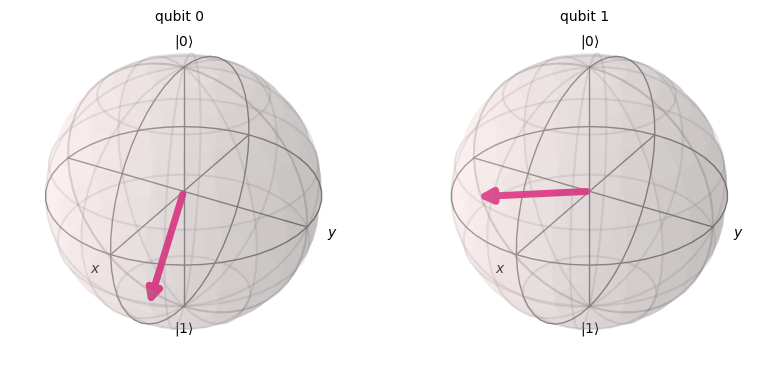

In [161]:
# State vector in normalized form
a = np.array([1,4,-3j, 1-4j])
a/= linalg.norm(a)
u = Statevector(a)
plot_bloch_multivector(u)

Before Mesurement Statevector V :


<IPython.core.display.Latex object>

Probablity to collaps on 0 : 0.5555555555555556 
Probablity to collaps on 1 : 0.4444444444444444 





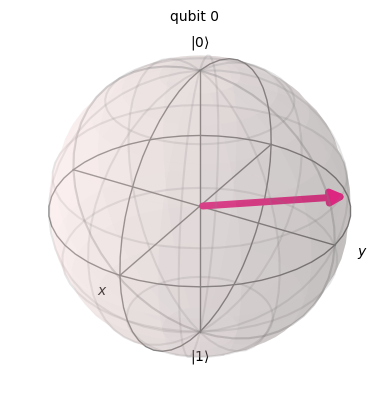

In [162]:
v = Statevector([(1+2.j)/3, -2/3])
print("Before Mesurement Statevector V :")
disp(v.draw('latex'))

prob_0 = linalg.norm(np.array(v)[0])**2
prob_1 = linalg.norm(np.array(v)[1])**2
 
print(f"Probablity to collaps on 0 : {prob_0} ")
print(f"Probablity to collaps on 1 : {prob_1} ")
print(2*"\n")

plot_bloch_multivector(v)

Measure respect to  '1' and V' is : 


<IPython.core.display.Latex object>

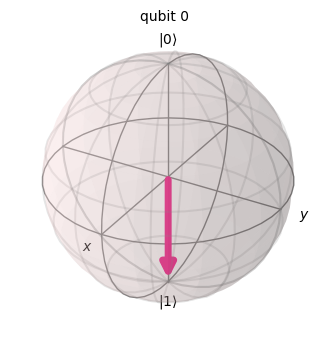

In [168]:
qubit_basis, v_prime = v.measure()

print(f"Measure respect to  '{qubit_basis}' and V' is : ")

disp(v_prime.draw('latex'))

plot_bloch_multivector(v_prime,figsize=(4,4))

{'0': 557, '1': 443}

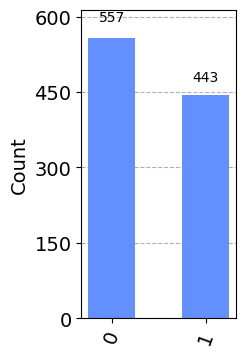

In [176]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics,figsize=(2,4))

### Quantum Operator

In [147]:
σx = np.array([[0,1],[1,0]], dtype=complex)
σy = np.array([[0,-1j],[1j,0]],dtype=complex)
H = np.array([[1,1],[1,-1]],dtype=complex)
H /= linalg.norm(H)
σ_x = Operator(σx)
σ_y = Operator(σy)
h = Operator(H)
disp(σ_x)
disp(σ_y)
disp(h)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 0.+0.j, -0.-1.j],
          [ 0.+1.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j]],
         input_dims=(2,), output_dims=(2,))

<IPython.core.display.Latex object>

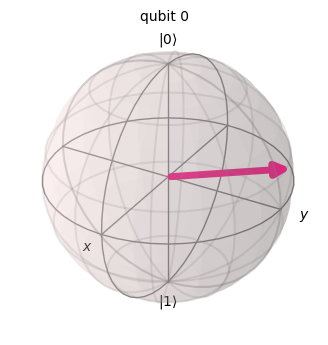

In [182]:
disp(v.evolve(σ_x).draw('latex'))
plot_bloch_multivector(v,figsize=(4,4))

### Quantum Circuit 

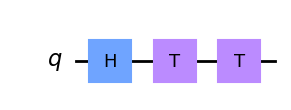

In [180]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
# circuit.h(0)
circuit.t(0)
# circuit.z(0)

circuit.draw()

In [181]:
ket0 = Statevector([1,0])
output_state_vector = ket0.evolve(circuit)
output_state_vector.draw('latex')



<IPython.core.display.Latex object>

### Tensor Product 

In [14]:
ket0,ket1 = Statevector.from_label('1'),Statevector.from_label('1')
ket0ket1 = ket0.tensor(ket1)
ket0ket1.draw('latex')


<IPython.core.display.Latex object>

### Entanglement 

#### Chalange 
Can you create each of the Bell states using only single-qubit state vectors and the CNOT operator?

In [35]:
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')

In [44]:
def draw_circuit_and_statevector(circuit):
    disp(circuit.draw())
    sv_bell_00 = qiskit.execute(circuit,backend = backend).result().get_statevector()
    disp(Statevector(sv_bell_00).draw('latex'))

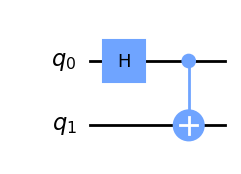

<IPython.core.display.Latex object>

In [45]:
bell_00= qiskit.QuantumCircuit(2)
bell_00.h(0)
bell_00.cnot(0,1)
draw_circuit_and_statevector(bell_00)

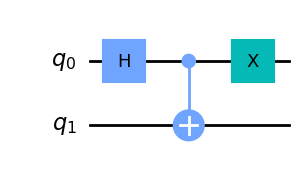

<IPython.core.display.Latex object>

In [62]:
bell_01 = qiskit.QuantumCircuit(2)
bell_01.h(0)
bell_01.cx(0,1)
bell_01.x(0)

draw_circuit_and_statevector(bell_01)

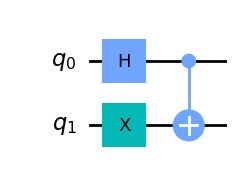

<IPython.core.display.Latex object>

In [49]:
bell_01 = qiskit.QuantumCircuit(2)
bell_01.h(0)
bell_01.x(1)
bell_01.cx(0,1)

draw_circuit_and_statevector(bell_01)

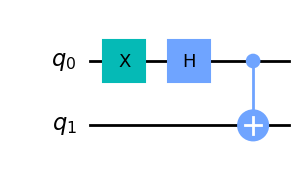

<IPython.core.display.Latex object>

In [51]:
bell_10 = qiskit.QuantumCircuit(2)
bell_10.x(0)
bell_10.h(0)
bell_10.cx(0,1)

draw_circuit_and_statevector(bell_10)

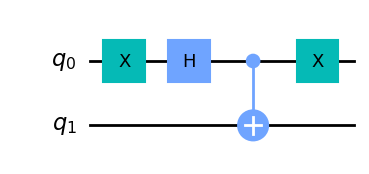

<IPython.core.display.Latex object>

In [68]:
bell_11 = qiskit.QuantumCircuit(2)
bell_11.x(0)
bell_11.h(0)
bell_11.cx(0,1)
bell_11.x(0)

draw_circuit_and_statevector(bell_11)